In [4]:
import duckdb
file = "C:/Users/manat/Documents/Projects/mtlBiodiversity/data/db/mtlbio.duckdb"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [5]:
con = duckdb.connect(file)
df = con.execute("SELECT * from grid_sjoin").df()

#df.head()

In [6]:
df.head(1)

,gbifID,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,...,recordedBy,issue,publishingOrgKey,coordinateUncertaintyInMeters,grid_id,minx,miny,maxx,maxy,geom
0,3998494771,q-10688069538,Plantae,Tracheophyta,Magnoliopsida,Apiales,Araliaceae,Aralia,Aralia racemosa,SPECIES,...,None,COORDINATE_ROUNDED;COUNTRY_DERIVED_FROM_COORDI...,da86174a-a605-43a4-a5e8-53d484152cd3,7.0,1098.0,-73.957862,45.430894,-73.955268,45.43247,"[2, 4, 0, 0, 0, 0, 0, 0, 109, 234, 147, 194, 6..."


In [7]:
orgs = df.issue.unique()
print(orgs)

['COORDINATE_ROUNDED;COUNTRY_DERIVED_FROM_COORDINATES;CONTINENT_DERIVED_FROM_COORDINATES'
 'COUNTRY_DERIVED_FROM_COORDINATES;CONTINENT_DERIVED_FROM_COORDINATES'
 'COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND'
 'CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND'
 'OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND'
 'COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND;TAXON_MATCH_HIGHERRANK'
 'OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND'
 'OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND;TAXON_MATCH_HIGHERRANK'
 'OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND;TAXON_MATCH_HIGHERRANK'
 'COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COORDINATES;TAXON_ID_NOT_FOUND;TAXON_MATCH_FUZZY'
 'COO

In [8]:

orgs = df.publishingOrgKey.unique()
#print(orgs)
mapping = { 'da86174a-a605-43a4-a5e8-53d484152cd3': 'plantNet',
            'b6d09100-919d-4026-b35b-22be3dae7156' : 'ebutterfly',
            '28eb1a3f-1c15-4a95-931a-4af90ecb574d' : 'inat'
    }
df['orgs'] = df['publishingOrgKey'].map(mapping)
df.head(2)

,gbifID,occurrenceID,kingdom,phylum,class,order,family,genus,species,taxonRank,...,issue,publishingOrgKey,coordinateUncertaintyInMeters,grid_id,minx,miny,maxx,maxy,geom,orgs
0,3998494771,q-10688069538,Plantae,Tracheophyta,Magnoliopsida,Apiales,Araliaceae,Aralia,Aralia racemosa,SPECIES,...,COORDINATE_ROUNDED;COUNTRY_DERIVED_FROM_COORDI...,da86174a-a605-43a4-a5e8-53d484152cd3,7.0,1098.0,-73.957862,45.430894,-73.955268,45.432470,"[2, 4, 0, 0, 0, 0, 0, 0, 109, 234, 147, 194, 6...",plantNet
1,3960185358,q-10623459328,Plantae,Tracheophyta,Magnoliopsida,Rosales,Rhamnaceae,Rhamnus,Rhamnus cathartica,SPECIES,...,COORDINATE_ROUNDED;COUNTRY_DERIVED_FROM_COORDI...,da86174a-a605-43a4-a5e8-53d484152cd3,31.0,1277.0,-73.955917,45.441137,-73.953323,45.442713,"[2, 4, 0, 0, 0, 0, 0, 0, 110, 233, 147, 194, 1...",plantNet


In [9]:
df_d = df[["orgs", "coordinateUncertaintyInMeters"]].copy()
df_d.head(2)

,orgs,coordinateUncertaintyInMeters
0,plantNet,7.0
1,plantNet,31.0


In [10]:
df_d.groupby('orgs').describe()

coordinateUncertaintyInMeters                                   \
                                   count       mean        std  min   25%   
orgs                                                                        
ebutterfly                         291.0  69.120275  42.936954  1.0  37.5   
inat                            121406.0  29.695979  38.584159  1.0   5.0   
plantNet                          4516.0  25.380647  24.313232  1.0   9.0   

                                 
              50%    75%    max  
orgs                             
ebutterfly  100.0  100.0  150.0  
inat         14.0   35.0  176.0  
plantNet     14.0   35.0  172.0

In [11]:

print(df.shape)
for t in [125, 176.8, 250, 500, 1000, 2000]:
    print(t, "|", ((df['coordinateUncertaintyInMeters'] <= t).sum() / df.shape[0]).round(2))

(126213, 29)
125 | 0.96
176.8 | 1.0
250 | 1.0
500 | 1.0
1000 | 1.0
2000 | 1.0


<Axes: ylabel='coordinateUncertaintyInMeters'>

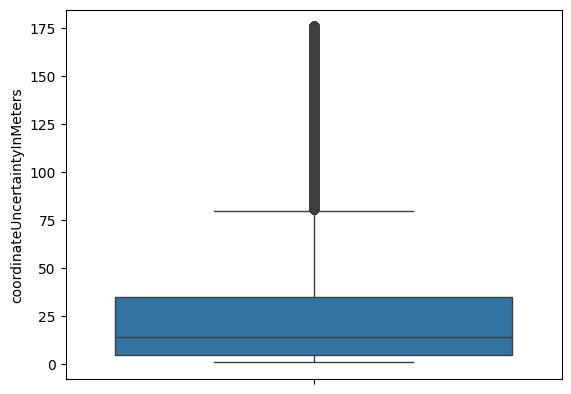

In [12]:
sns.boxplot(df, y = df.coordinateUncertaintyInMeters)


<Axes: xlabel='orgs', ylabel='coordinateUncertaintyInMeters'>

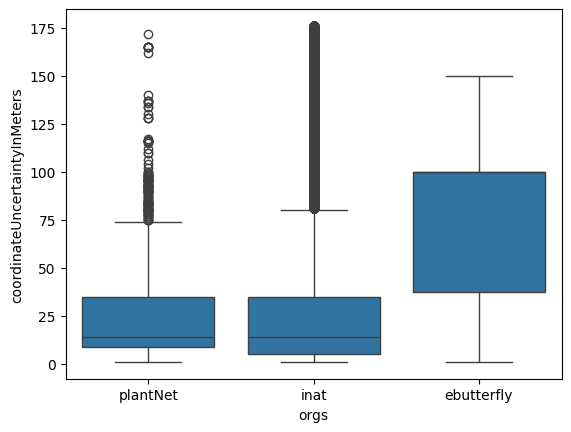

In [13]:
sns.boxplot(df, x = df.orgs,y = df.coordinateUncertaintyInMeters)
#df.coordinateUncertaintyInMeters.median

In [14]:
df_issues = df.groupby(['grid_id']).agg(issue_count = ('issue', 'nunique'),
                                        species_richness = ('species', 'nunique'),
                                        coordinateUncertaintyMax = ('coordinateUncertaintyInMeters', 'max'),
                                        coordinateUncertaintyMean = ('coordinateUncertaintyInMeters', 'mean'),
                                        coordinateUncertaintyMedian = ('coordinateUncertaintyInMeters', 'median')
                                    
                                        
                                        ).sort_values(by = 'species_richness', ascending= False)
df_issues.head(2)
#df_issues.describe()

,issue_count,species_richness,coordinateUncertaintyMax,coordinateUncertaintyMean,coordinateUncertaintyMedian
grid_id,,,,,
34294.0,5,485,83.0,13.001985,1.0
36027.0,4,359,169.0,24.245638,18.0


In [15]:
df_orgs = df.groupby(['grid_id']).agg(orgs = ('publishingOrgKey', pd.Series.mode))
df_orgs.head()


,orgs
grid_id,
181.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
182.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
365.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
367.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
538.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d


In [16]:
df1 = df_issues.merge(df_orgs, on = 'grid_id')
df1.head()

,issue_count,species_richness,coordinateUncertaintyMax,coordinateUncertaintyMean,coordinateUncertaintyMedian,orgs
grid_id,,,,,,
34294.0,5,485,83.0,13.001985,1.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
36027.0,4,359,169.0,24.245638,18.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
28055.0,5,342,176.0,18.079455,8.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
37995.0,5,245,169.0,25.396594,10.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
41532.0,4,244,149.0,30.803119,15.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d


In [17]:
#List issue from grid cell: 

x = df.loc[df['grid_id'] == 34294, ['issue', 'gbifID']]
print(x)

                                                    issue      gbifID
4821    COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  4507879014
4822    COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  4522527516
4823    COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  4908971906
4824    COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  4910929014
4825    COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  5292329385
...                                                   ...         ...
125512  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  4908924318
125518  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  4519153732
125528  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  5292495509
125535  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  5828128798
125538  COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...  5217057527

[1511 rows x 2 columns]


In [1]:
con.close()

NameError: name 'con' is not defined